In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import os

from algs import *
from data import *

In [2]:
symbol = 'A'
data = get_days(get_full_df(symbol), days=365);
gain = find_maximum_subarray(data.change)
loss = find_maximum_subarray(-data.change)

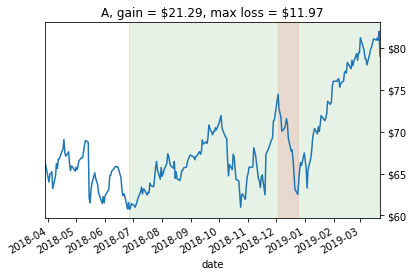

In [3]:
fig, ax = plt.subplots()
data.adj_close.plot()

# add dollar sign to y axis labels
formatter = ticker.FormatStrFormatter('$%.f')
ax.yaxis.set_major_formatter(formatter)

# put dollar amount labels on the right
ax.tick_params(left=False, right=True)
for tick in ax.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = True

# add highlight box for hold period
plt.axvspan(data.index[gain['low']-1], data.index[gain['high']], color='green', alpha=0.1)
plt.axvspan(data.index[loss['low']-1], data.index[loss['high']], color='red', alpha=0.1)
plt.title(f'{symbol}, gain = \${gain["sum"]:.2f}, max loss = \${loss["sum"]:.2f}')

plt.savefig('test.svg')
plt.show()